<a href='https://ai.meng.duke.edu'> = <img align="left" style="padding-top:10px;" src=https://storage.googleapis.com/aipi_datasets/Duke-AIPI-Logo.png>

# Weather data time series analysis

## Prepare the data
We will start by loading the necessary libraries and reading in the dataset to a pandas dataframe.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Read in the data and display the head to see what data we have
weather_data = pd.read_csv("data/RDU.csv")
print(weather_data.dtypes)
weather_data.head()


station              object
valid                object
tmpf                 object
dwpf                 object
relh                 object
drct                 object
sknt                 object
p01i                 object
alti                 object
mslp                 object
vsby                 object
gust                 object
skyc1                object
skyc2                object
skyc3                object
skyc4                object
skyl1                object
skyl2                object
skyl3                object
skyl4                object
wxcodes              object
ice_accretion_1hr    object
ice_accretion_3hr    object
ice_accretion_6hr    object
peak_wind_gust       object
peak_wind_drct       object
peak_wind_time       object
feel                 object
metar                object
snowdepth            object
dtype: object


,station,valid,tmpf,dwpf,relh,drct,sknt,p01i,alti,mslp,...,wxcodes,ice_accretion_1hr,ice_accretion_3hr,ice_accretion_6hr,peak_wind_gust,peak_wind_drct,peak_wind_time,feel,metar,snowdepth
0,RDU,1945-11-01 00:00,57.38,53.42,86.60,158.00,4.00,M,M,1014.90,...,M,M,M,M,M,M,M,57.38,KRDU 010500Z AUTO 15804KT 15SM 14/12 RMK SLP14...,M
1,RDU,1945-11-01 01:00,58.28,53.42,83.84,225.00,4.00,M,M,1014.90,...,M,M,M,M,M,M,M,58.28,KRDU 010600Z AUTO 22504KT 15SM 15/12 RMK SLP14...,M
2,RDU,1945-11-01 02:00,57.38,53.42,86.60,225.00,3.00,M,M,1014.90,...,M,M,M,M,M,M,M,57.38,KRDU 010700Z AUTO 22503KT 15SM 14/12 RMK SLP14...,M
3,RDU,1945-11-01 03:00,55.40,52.34,89.41,225.00,4.00,M,M,1014.60,...,M,M,M,M,M,M,M,55.40,KRDU 010800Z AUTO 22504KT 15SM 13/11 RMK SLP14...,M
4,RDU,1945-11-01 04:00,54.32,52.34,93.00,225.00,3.00,M,M,1014.60,...,M,M,M,M,M,M,M,54.32,KRDU 010900Z AUTO 22503KT 15SM 12/11 RMK SLP14...,M


In [2]:
# Convert valid to datetime
weather_data['valid'] = pd.to_datetime(weather_data['valid'])
print (weather_data.dtypes)


station                      object
valid                datetime64[ns]
tmpf                         object
dwpf                         object
relh                         object
drct                         object
sknt                         object
p01i                         object
alti                         object
mslp                         object
vsby                         object
gust                         object
skyc1                        object
skyc2                        object
skyc3                        object
skyc4                        object
skyl1                        object
skyl2                        object
skyl3                        object
skyl4                        object
wxcodes                      object
ice_accretion_1hr            object
ice_accretion_3hr            object
ice_accretion_6hr            object
peak_wind_gust               object
peak_wind_drct               object
peak_wind_time               object
feel                        

We can add additional columns to store unique features of the data e.g. the year, month, day or hour

In [3]:
weather_data['DAY'] = weather_data['valid'].dt.day
weather_data['MONTH'] = weather_data['valid'].dt.month
weather_data["hour"]=weather_data["valid"].dt.hour
weather_data["dayofweek"] = weather_data["valid"].dt.dayofweek
weather_data.head()

,station,valid,tmpf,dwpf,relh,drct,sknt,p01i,alti,mslp,...,peak_wind_gust,peak_wind_drct,peak_wind_time,feel,metar,snowdepth,DAY,MONTH,hour,dayofweek
0,RDU,1945-11-01 00:00:00,57.38,53.42,86.60,158.00,4.00,M,M,1014.90,...,M,M,M,57.38,KRDU 010500Z AUTO 15804KT 15SM 14/12 RMK SLP14...,M,1,11,0,3
1,RDU,1945-11-01 01:00:00,58.28,53.42,83.84,225.00,4.00,M,M,1014.90,...,M,M,M,58.28,KRDU 010600Z AUTO 22504KT 15SM 15/12 RMK SLP14...,M,1,11,1,3
2,RDU,1945-11-01 02:00:00,57.38,53.42,86.60,225.00,3.00,M,M,1014.90,...,M,M,M,57.38,KRDU 010700Z AUTO 22503KT 15SM 14/12 RMK SLP14...,M,1,11,2,3
3,RDU,1945-11-01 03:00:00,55.40,52.34,89.41,225.00,4.00,M,M,1014.60,...,M,M,M,55.40,KRDU 010800Z AUTO 22504KT 15SM 13/11 RMK SLP14...,M,1,11,3,3
4,RDU,1945-11-01 04:00:00,54.32,52.34,93.00,225.00,3.00,M,M,1014.60,...,M,M,M,54.32,KRDU 010900Z AUTO 22503KT 15SM 12/11 RMK SLP14...,M,1,11,4,3


In [4]:
weather_data["tmpf"] = pd.to_numeric(weather_data["tmpf"], errors="coerce")


## Separating Training Set From Test Set

In [5]:
# Define test window
start_date = "2025-09-17 00:00:00"
end_date   = "2025-09-30 23:00:00"

# Test set
mask_test = (weather_data["valid"] >= start_date) & (weather_data["valid"] <= end_date)
test_data = weather_data.loc[mask_test]

# Training set = everything before test window
mask_train = (weather_data["valid"] < start_date)
train_data = weather_data.loc[mask_train]


## Looks noisy

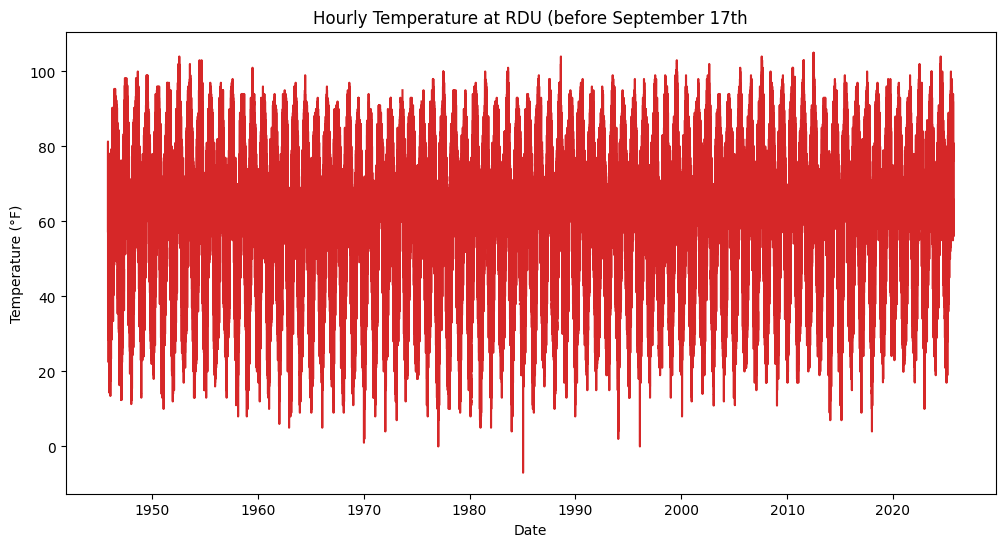

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(train_data["valid"], train_data["tmpf"], color="tab:red")
plt.xlabel("Date")
plt.ylabel("Temperature (°F)")
plt.title("Hourly Temperature at RDU (before September 17th)")
plt.show()


## Smoothening the noise
## Smoothened but still noisy because of the volume of data

<class 'pandas.core.indexes.datetimes.DatetimeIndex'> DatetimeIndex(['1945-11-01 00:00:00', '1945-11-01 01:00:00',
               '1945-11-01 02:00:00'],
              dtype='datetime64[ns]', name='valid', freq=None)


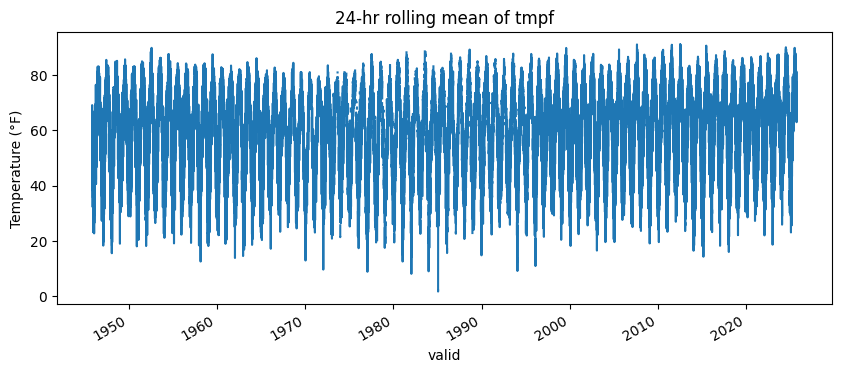

In [13]:
# 2) set it as the index (assign the result)
df_filtered = train_data.set_index('valid')
# Or: df_filtered.set_index('valid', inplace=True)

# 3) confirm the index is a DatetimeIndex
print(type(df_filtered.index), df_filtered.index[:3])

# 4) plot the 24-hour rolling mean with nicer date ticks
ax = df_filtered['tmpf'].rolling(window=24).mean().plot(figsize=(10,4))
ax.set_ylabel('Temperature (°F)')
ax.set_title('24-hr rolling mean of tmpf')
plt.gcf().autofmt_xdate()   # rotate and format date labels
plt.show()


## Checking for missing values

In [15]:
# after you set the index
#train_data = train_data.set_index("valid")

# quick checks
print("Length:", len(train_data))
print("NaNs in tmpf:", train_data["tmpf"].isna().sum())
print(train_data["tmpf"].isna().sum() / len(train_data))  # fraction missing

# show the first few missing rows (if any)
train_data[train_data["tmpf"].isna()].head(10)


Length: 720742
NaNs in tmpf: 22550
0.03128720124538323


,station,valid,tmpf,dwpf,relh,drct,sknt,p01i,alti,mslp,...,peak_wind_gust,peak_wind_drct,peak_wind_time,feel,metar,snowdepth,DAY,MONTH,hour,dayofweek
4826,RDU,1946-05-21 16:00:00,NaN,M,M,338.00,19.00,M,M,1012.20,...,M,M,M,M,KRDU 212000Z AUTO 33819KT 20SM RMK SLP122 IEM_...,M,21,5,16,1
6492,RDU,1946-07-30 05:00:00,NaN,M,M,90.00,6.00,M,M,1019.60,...,M,M,M,M,KRDU 300900Z AUTO 09006KT 10SM RMK SLP196 IEM_...,M,30,7,5,1
25594,RDU,1948-10-09 12:00:00,NaN,M,M,270.00,9.00,M,29.97,1014.90,...,M,M,M,M,METAR KRDU 091700Z 27009KT 15SM CLR A//// RMK...,M,9,10,12,5
25725,RDU,1948-10-15 01:00:00,NaN,M,M,0.00,0.00,M,M,M,...,M,M,M,M,METAR KRDU 150600Z 00000KT 1/8SM FG A//// RMK...,M,15,10,1,4
30090,RDU,1949-04-15 07:00:00,NaN,M,M,200.00,13.00,M,29.77,1008.20,...,M,M,M,M,METAR KRDU 151200Z 20013KT 15SM CLR A//// RMK...,M,15,4,7,4
52817,RDU,1951-11-20 14:00:00,NaN,M,M,320.00,5.00,M,30.37,1028.4,...,M,M,M,M,METAR KRDU 201900Z 32005KT 20SM CLR A//// RMK...,M,20,11,14,1
74586,RDU,1954-05-17 13:00:00,NaN,M,M,270.00,7.00,M,29.90,1012.5,...,M,M,M,M,METAR KRDU 171700Z 27007KT 15SM SCT/// BKN/// ...,M,17,5,13,0
81996,RDU,1955-03-22 17:00:00,NaN,M,M,290.00,20.00,M,29.53,1000.0,...,M,M,M,M,METAR KRDU 222200Z 29020KT 15SM SCT/// SCT/// ...,M,22,3,17,1
89647,RDU,1956-02-04 17:00:00,NaN,M,M,340.00,5.00,0.02,30.07,1018.3,...,M,M,M,M,METAR KRDU 042200Z 34005KT 4SM -RA FG SCT/// O...,M,4,2,17,5
202788,RDU,1973-01-01 05:28:00,NaN,M,M,200.00,11.00,M,30.09,M,...,M,M,M,M,KRDU 011028Z AUTO 20011KT 7SM A3009 RMK IEM_DS...,M,1,1,5,0


## making index regular hourly

In [18]:
# Option A — time interpolation (good for datetime index)
df_filtered['tmpf_interpolated'] = df_filtered['tmpf'].interpolate(method='time')

# Check still missing
print("NaNs after impute:", df_filtered['tmpf_interpolated'].isna().sum())


NaNs after impute: 0


## When valid is made the index, we see that there are duplicate rows but they have slightly different values for specific features, that means this is from the dataset itself

In [23]:
# How many duplicates?
dup_mask = df_filtered.index.duplicated(keep=False)
print("Number of duplicate rows:", dup_mask.sum())

# See a few duplicate timestamps
dup_times = df_filtered.index[dup_mask].unique()[:10]
for ts in dup_times:
    print("\n===", ts, "===")
    print(df_filtered.loc[ts])


Number of duplicate rows: 146

=== 1946-09-29 01:00:00 ===
                    station   tmpf   dwpf   relh   drct  sknt p01i alti  \
valid                                                                     
1946-09-29 01:00:00     RDU  67.28  65.30  93.36  23.00  6.00    M    M   
1946-09-29 01:00:00     RDU  67.28  66.38  96.93  68.00  6.00    M    M   

                        mslp  vsby  ... peak_wind_drct peak_wind_time   feel  \
valid                               ...                                        
1946-09-29 01:00:00  1021.00  10.0  ...              M              M  67.28   
1946-09-29 01:00:00  1020.70   8.0  ...              M              M  67.28   

                                                                 metar  \
valid                                                                    
1946-09-29 01:00:00  KRDU 290500Z AUTO 02306KT 10SM 20/18 RMK SLP21...   
1946-09-29 01:00:00  KRDU 290600Z AUTO 06806KT 8SM 20/19 RMK SLP207...   

                    sn

## Due to above, we group rows by if they have the same time stamp then find the mean of the values and use that

## We first have to convert non numeric columns into numeric columns

In [25]:
import pandas as pd

def clean_weather(df):
    # 1. Drop station (always RDU) and raw text METAR
    df = df.drop(columns=["station", "metar"], errors="ignore")

    # 2. One-hot encode categorical sky cover + weather codes
    categorical_cols = ["skyc1", "skyc2", "skyc3", "skyc4", "wxcodes"]
    df = pd.get_dummies(df, columns=categorical_cols, dummy_na=True)

    # 3. Convert all remaining object cols to numeric (coerce errors -> NaN)
    for col in df.columns:
        if df[col].dtype == "object":
            df[col] = pd.to_numeric(df[col], errors="coerce")

    # 4. Make sure datetime index is set
    if "valid" in df.columns:
        df["valid"] = pd.to_datetime(df["valid"], errors="coerce")
        df = df.set_index("valid")

    # 5. Collapse duplicate timestamps by taking mean across numeric & one-hot cols
    df = df.groupby(level=0).mean(numeric_only=True)

    return df


In [26]:
df_clean = clean_weather(df_filtered.copy())
print("Final shape:", df_clean.shape)
print("Any duplicates left?", df_clean.index.duplicated().sum())
print(df_clean.head())

Final shape: (720669, 318)
Any duplicates left? 0
                      tmpf   dwpf   relh   drct  sknt  p01i  alti    mslp  \
valid                                                                       
1945-11-01 00:00:00  57.38  53.42  86.60  158.0   4.0   NaN   NaN  1014.9   
1945-11-01 01:00:00  58.28  53.42  83.84  225.0   4.0   NaN   NaN  1014.9   
1945-11-01 02:00:00  57.38  53.42  86.60  225.0   3.0   NaN   NaN  1014.9   
1945-11-01 03:00:00  55.40  52.34  89.41  225.0   4.0   NaN   NaN  1014.6   
1945-11-01 04:00:00  54.32  52.34  93.00  225.0   3.0   NaN   NaN  1014.6   

                     vsby  gust  ...  wxcodes_VCFG BR  wxcodes_VCSH  \
valid                            ...                                  
1945-11-01 00:00:00  15.0   NaN  ...              0.0           0.0   
1945-11-01 01:00:00  15.0   NaN  ...              0.0           0.0   
1945-11-01 02:00:00  15.0   NaN  ...              0.0           0.0   
1945-11-01 03:00:00  15.0   NaN  ...              0.0  

## Make an hourly series plus check missing

In [28]:
# Hourly grid (keeps NaN where data is missing)
df_hourly = df_clean[['tmpf']].sort_index().resample('H').mean()

n_total = len(df_hourly)
n_nonnull = df_hourly['tmpf'].notna().sum()
print("Hours:", n_total, "| non-null tmpf:", n_nonnull, "| null tmpf:", n_total - n_nonnull)


Hours: 700200 | non-null tmpf: 663912 | null tmpf: 36288


## Checking gap lengths

In [29]:
import pandas as pd

isna = df_hourly['tmpf'].isna().astype(int).values
idx = df_hourly.index

gap_runs = []
start_i = None
for i, v in enumerate(isna):
    if v == 1 and start_i is None:
        start_i = i
    if (v == 0 or i == len(isna)-1) and start_i is not None:
        end_i = i-1 if v == 0 else i
        length = end_i - start_i + 1  # hours (since hourly grid)
        gap_runs.append((idx[start_i], idx[end_i], length))
        start_i = None

# Show the biggest 10 gaps
gap_runs_sorted = sorted(gap_runs, key=lambda x: x[2], reverse=True)
print("Top NaN gaps (start, end, length_hrs):")
for r in gap_runs_sorted[:10]:
    print(r)


Top NaN gaps (start, end, length_hrs):
(Timestamp('1946-09-04 09:00:00'), Timestamp('1946-09-07 14:00:00'), 78)
(Timestamp('1946-09-24 02:00:00'), Timestamp('1946-09-26 11:00:00'), 58)
(Timestamp('1996-02-28 01:00:00'), Timestamp('1996-02-28 23:00:00'), 23)
(Timestamp('2000-02-21 00:00:00'), Timestamp('2000-02-21 17:00:00'), 18)
(Timestamp('2000-11-12 01:00:00'), Timestamp('2000-11-12 14:00:00'), 14)
(Timestamp('2008-12-02 19:00:00'), Timestamp('2008-12-03 07:00:00'), 13)
(Timestamp('2000-02-28 08:00:00'), Timestamp('2000-02-28 17:00:00'), 10)
(Timestamp('2000-01-01 00:00:00'), Timestamp('2000-01-01 08:00:00'), 9)
(Timestamp('1996-06-30 20:00:00'), Timestamp('1996-07-01 03:00:00'), 8)
(Timestamp('2000-01-15 06:00:00'), Timestamp('2000-01-15 13:00:00'), 8)


## Interpolate small gaps

In [30]:
# Fill interior gaps up to 3 consecutive hours; leave long gaps untouched
df_hourly['tmpf_interp'] = df_hourly['tmpf'].interpolate(
    method='time',
    limit=3,                 # <= 3 consecutive NaNs only
    limit_direction='both',  # allow forward/backward within the interior
    limit_area='inside'      # do NOT fill at the edges
)

print("Nulls before:", df_hourly['tmpf'].isna().sum(),
      "| after:", df_hourly['tmpf_interp'].isna().sum())


Nulls before: 36288 | after: 180


## Verify whats left

In [31]:
isna_after = df_hourly['tmpf_interp'].isna().astype(int).values
idx = df_hourly.index

remaining_gaps = []
start_i = None
for i, v in enumerate(isna_after):
    if v == 1 and start_i is None:
        start_i = i
    if (v == 0 or i == len(isna_after)-1) and start_i is not None:
        end_i = i-1 if v == 0 else i
        length = end_i - start_i + 1
        remaining_gaps.append((idx[start_i], idx[end_i], length))
        start_i = None

remaining_gaps_sorted = sorted(remaining_gaps, key=lambda x: x[2], reverse=True)
print("Remaining NaN gaps (should be > 3 hrs):")
for r in remaining_gaps_sorted[:10]:
    print(r)


Remaining NaN gaps (should be > 3 hrs):
(Timestamp('1946-09-04 12:00:00'), Timestamp('1946-09-07 11:00:00'), 72)
(Timestamp('1946-09-24 05:00:00'), Timestamp('1946-09-26 08:00:00'), 52)
(Timestamp('1996-02-28 04:00:00'), Timestamp('1996-02-28 20:00:00'), 17)
(Timestamp('2000-02-21 03:00:00'), Timestamp('2000-02-21 14:00:00'), 12)
(Timestamp('2000-11-12 04:00:00'), Timestamp('2000-11-12 11:00:00'), 8)
(Timestamp('2008-12-02 22:00:00'), Timestamp('2008-12-03 04:00:00'), 7)
(Timestamp('2000-02-28 11:00:00'), Timestamp('2000-02-28 14:00:00'), 4)
(Timestamp('2000-01-01 03:00:00'), Timestamp('2000-01-01 05:00:00'), 3)
(Timestamp('1996-06-30 23:00:00'), Timestamp('1996-07-01 00:00:00'), 2)
(Timestamp('2000-01-15 09:00:00'), Timestamp('2000-01-15 10:00:00'), 2)


## Dropping the ones with NANS

In [34]:
df_hourly = df_hourly.dropna(subset=['tmpf'])


In [36]:
print("Remaining NaNs:", df_hourly['tmpf'].isna().sum())
print("Final shape:", df_hourly.shape)


Remaining NaNs: 0
Final shape: (700020, 1)


##Seasonal Decomposition (daily,weekly,yearly cycles)

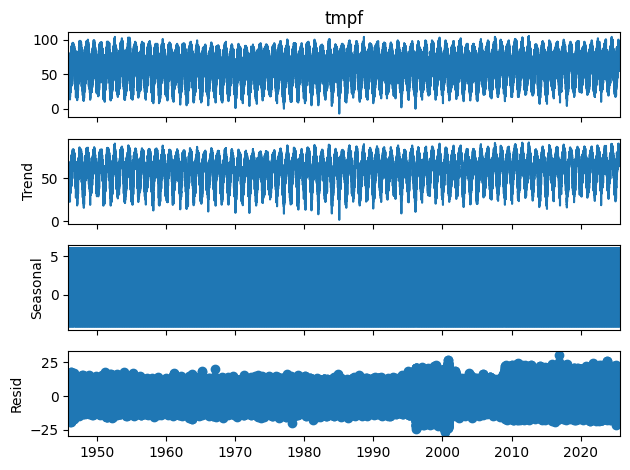

In [37]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

decomposition = sm.tsa.seasonal_decompose(
    df_hourly['tmpf'], model='additive', period=24, extrapolate_trend='freq'
)
decomposition.plot()
plt.show()


## Feature Engineering for forecasting

In [38]:
df_hourly['lag1'] = df_hourly['tmpf'].shift(1)        # 1-hour lag
df_hourly['rolling24'] = df_hourly['tmpf'].rolling(24).mean()  # daily avg
df_hourly = df_hourly.dropna()


## Inspecting df_hourly

In [41]:
df_hourly.head()

,tmpf,lag1,rolling24
valid,,,
1945-11-02 22:00:00,66.38,66.38,67.7375
1945-11-02 23:00:00,65.30,66.38,67.9025
1945-11-03 00:00:00,65.30,65.30,68.0675
1945-11-03 01:00:00,64.40,65.30,68.2400
1945-11-03 02:00:00,64.40,64.40,68.4500


## Train test split for predictive modeling

In [43]:
# Define test window
start_date = "2025-09-17 00:00:00"
end_date   = "2025-09-30 23:00:00"

# Training set = cleaned hourly data before test window
mask_train = (df_hourly.index < start_date)
train_data = df_hourly.loc[mask_train]

# Test set = actual values (uncleaned) from original dataset
mask_test = (weather_data["valid"] >= start_date) & (weather_data["valid"] <= end_date)
test_data = weather_data.loc[mask_test, ["valid", "tmpf"]].set_index("valid")

print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)
print("Train period:", train_data.index.min(), "->", train_data.index.max())
print("Test period:", test_data.index.min(), "->", test_data.index.max())


Train shape: (699974, 3)
Test shape: (380, 1)
Train period: 1945-11-02 22:00:00 -> 2025-09-16 23:00:00
Test period: 2025-09-17 00:51:00 -> 2025-09-30 22:51:00


## Starting with Linear Regression, getting the features

In [44]:
import pandas as pd
import numpy as np

# Start from cleaned hourly train_data
df_features = train_data.copy()

# Lag features
df_features['lag1'] = df_features['tmpf'].shift(1)
df_features['lag24'] = df_features['tmpf'].shift(24)  # same hour yesterday

# Rolling feature
df_features['rolling24'] = df_features['tmpf'].rolling(24).mean()

# Seasonal features
df_features['hour'] = df_features.index.hour
df_features['month'] = df_features.index.month

# Drop rows with NaNs (first 24 hours will be NaN because of lag/rolling)
df_features = df_features.dropna()

print(df_features.head())


                      tmpf   lag1  rolling24  lag24  hour  month
valid                                                           
1945-11-03 22:00:00  48.38  52.34   65.45375  66.38    22     11
1945-11-03 23:00:00  48.38  48.38   64.74875  65.30    23     11
1945-11-04 00:00:00  47.30  48.38   63.99875  65.30     0     11
1945-11-04 01:00:00  47.30  47.30   63.28625  64.40     1     11
1945-11-04 02:00:00  47.30  47.30   62.57375  64.40     2     11


## Prepare Train sets

In [45]:
from sklearn.linear_model import LinearRegression

# Features and target
X_train = df_features[['lag1','lag24','rolling24','hour','month']]
y_train = df_features['tmpf']

# Fit linear regression model
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

print("Train R^2:", model_lr.score(X_train, y_train))


Train R^2: 0.9810063419444114


## Set up for autoregressive forecasting

In [46]:
# Define test window
start_date = "2025-09-17 00:00:00"
end_date   = "2025-09-30 23:00:00"
test_index = pd.date_range(start=start_date, end=end_date, freq="H")

# Initialize list to store predictions
predictions = []

# Get the last 24 hours of training data (needed for lags)
history = train_data.copy()


## Forecast Loop

In [47]:
for ts in test_index:
    # Build feature row for this timestamp
    lag1 = history['tmpf'].iloc[-1]
    lag24 = history['tmpf'].iloc[-24] if len(history) >= 24 else lag1
    rolling24 = history['tmpf'].iloc[-24:].mean() if len(history) >= 24 else history['tmpf'].mean()
    hour = ts.hour
    month = ts.month

    X_new = pd.DataFrame([[lag1, lag24, rolling24, hour, month]],
                         columns=['lag1','lag24','rolling24','hour','month'])

    # Predict temperature
    yhat = model_lr.predict(X_new)[0]

    # Append prediction
    predictions.append((ts, yhat))

    # Update history with prediction (autoregressive step)
    history.loc[ts] = yhat


## Collect predictions into dataframe

In [48]:
df_forecast = pd.DataFrame(predictions, columns=['valid','pred_tmpf']).set_index('valid')

print(df_forecast.head())
print(df_forecast.tail())


                     pred_tmpf
valid                         
2025-09-17 00:00:00  64.078308
2025-09-17 01:00:00  64.984797
2025-09-17 02:00:00  65.719948
2025-09-17 03:00:00  66.351385
2025-09-17 04:00:00  66.880403
                     pred_tmpf
valid                         
2025-09-30 19:00:00  62.989613
2025-09-30 20:00:00  62.201237
2025-09-30 21:00:00  61.286720
2025-09-30 22:00:00  60.240309
2025-09-30 23:00:00  59.055988


## Compare with actual test set but need to convert to numeric first since it is type object

In [51]:
# Actual test temps (raw, possibly object dtype)
mask_test = (weather_data["valid"] >= start_date) & (weather_data["valid"] <= end_date)
test_data = weather_data.loc[mask_test, ["valid","tmpf"]].set_index("valid")

# Convert to numeric, coercing bad entries to NaN
test_data['tmpf'] = pd.to_numeric(test_data['tmpf'], errors='coerce')

# Merge with predictions
df_results = df_forecast.join(test_data, how="left").rename(columns={'tmpf':'actual_tmpf'})

print(df_results.dtypes)   # confirm actual_tmpf is float now
print(df_results.head())


pred_tmpf      float64
actual_tmpf    float64
dtype: object
                     pred_tmpf  actual_tmpf
valid                                      
2025-09-17 00:00:00  64.078308          NaN
2025-09-17 01:00:00  64.984797          NaN
2025-09-17 02:00:00  65.719948          NaN
2025-09-17 03:00:00  66.351385          NaN
2025-09-17 04:00:00  66.880403          NaN


In [53]:
mask_test = (weather_data["valid"] >= start_date) & (weather_data["valid"] <= end_date)
test_data = weather_data.loc[mask_test, ["valid","tmpf"]].copy()
test_data['tmpf'] = pd.to_numeric(test_data['tmpf'], errors='coerce')

print("Test rows:", len(test_data))
print("Non-null after coercion:", test_data['tmpf'].notna().sum())


Test rows: 380
Non-null after coercion: 380


## Resample the test data to the same hourly grid

In [54]:
# Put test set on the hourly grid
test_data = test_data.set_index("valid").resample("H").mean()

# Merge predictions with actuals
df_results = df_forecast.join(test_data, how="left").rename(columns={'tmpf':'actual_tmpf'})

print("Forecast rows:", len(df_forecast))
print("Actual rows after resample:", len(test_data))
print("Non-null actuals after join:", df_results['actual_tmpf'].notna().sum())
print(df_results.head())


Forecast rows: 336
Actual rows after resample: 335
Non-null actuals after join: 333
                     pred_tmpf  actual_tmpf
valid                                      
2025-09-17 00:00:00  64.078308         63.0
2025-09-17 01:00:00  64.984797         62.0
2025-09-17 02:00:00  65.719948         62.0
2025-09-17 03:00:00  66.351385         62.0
2025-09-17 04:00:00  66.880403         61.0


## Evaluate safely

In [59]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Drop rows with missing actuals
df_eval = df_results.dropna(subset=['actual_tmpf'])

# Metrics
mae = mean_absolute_error(df_eval['actual_tmpf'], df_eval['pred_tmpf'])
mse = mean_squared_error(df_eval['actual_tmpf'], df_eval['pred_tmpf'])

print("Test MAE :", mae)
print("Test MSE :", mse)


Test MAE : 9.496020381593587
Test MSE : 130.99266254724205


## Testing with random forest

In [60]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(
    n_estimators=200,   # number of trees
    max_depth=20,       # limit depth to avoid overfitting
    random_state=42,
    n_jobs=-1           # use all CPU cores
)
rf_model.fit(X_train, y_train)

print("Train R^2:", rf_model.score(X_train, y_train))


Train R^2: 0.9955397670685547


## Forecast Loop autoregressive

In [61]:
# Define test horizon
start_date = "2025-09-17 00:00:00"
end_date   = "2025-09-30 23:00:00"
test_index = pd.date_range(start=start_date, end=end_date, freq="H")

predictions = []
history = train_data.copy()

for ts in test_index:
    lag1 = history['tmpf'].iloc[-1]
    lag24 = history['tmpf'].iloc[-24] if len(history) >= 24 else lag1
    rolling24 = history['tmpf'].iloc[-24:].mean() if len(history) >= 24 else history['tmpf'].mean()
    hour = ts.hour
    month = ts.month

    X_new = pd.DataFrame([[lag1, lag24, rolling24, hour, month]],
                         columns=['lag1','lag24','rolling24','hour','month'])

    yhat = rf_model.predict(X_new)[0]

    predictions.append((ts, yhat))
    history.loc[ts] = yhat  # autoregressive update


## Collect predictions plus compare with actual

In [62]:
df_forecast = pd.DataFrame(predictions, columns=['valid','pred_tmpf']).set_index('valid')

# Actuals (resampled to hourly)
mask_test = (weather_data["valid"] >= start_date) & (weather_data["valid"] <= end_date)
test_data = weather_data.loc[mask_test, ["valid","tmpf"]].copy()
test_data['tmpf'] = pd.to_numeric(test_data['tmpf'], errors='coerce')
test_data = test_data.set_index("valid").resample("H").mean()

# Merge
df_results = df_forecast.join(test_data, how="left").rename(columns={'tmpf':'actual_tmpf'})


## Evaluate

In [66]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

df_eval = df_results.dropna(subset=['actual_tmpf'])

mae = mean_absolute_error(df_eval['actual_tmpf'], df_eval['pred_tmpf'])
mse = mean_squared_error(df_eval['actual_tmpf'], df_eval['pred_tmpf'])

print("Random Forest MAE :", mae)
print("Random Forest MSE :", mse)



Random Forest MAE : 4.402482941842356
Random Forest MSE : 30.589917922354033


<Axes: xlabel='valid'>

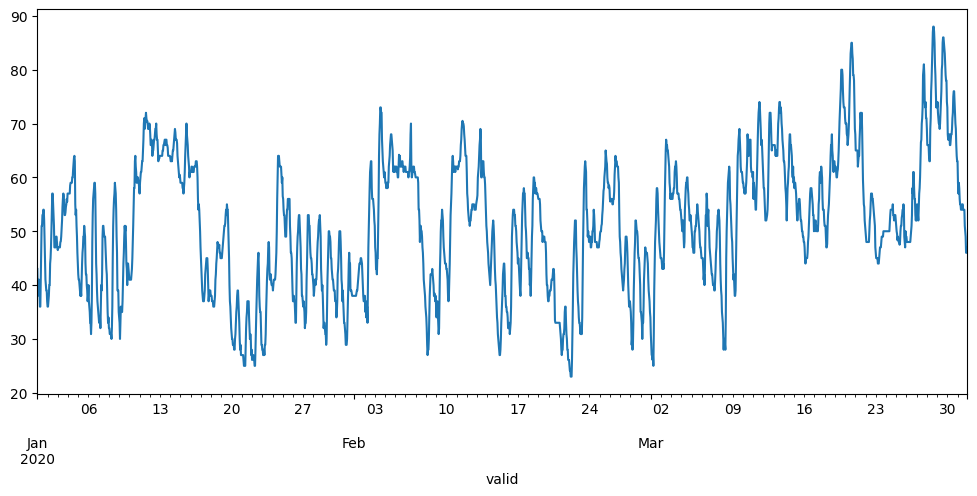

In [67]:
df_hourly['tmpf'].loc['2020-01':'2020-03'].plot(figsize=(12,5))
